# Fitting a quadratic polynomial

In [ ]:
using Plots, Zygote , LinearAlgebra

### Dataset Collection for a quadratic curve & its graphical analysis

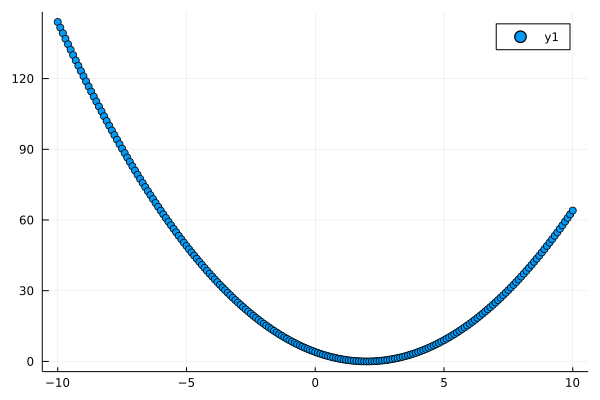

In [5]:
x = collect(-10:0.1:10)   
y = map(x->x^2-4x+4, x)    #Quadratic equation

ns=length(x)
x=reshape(x, length(x), 1);
plot(x,y,seriestype = :scatter)

In [6]:
f(x1,a,b,c) = a*(x1^2)+b*x1 +c

y_pred=zeros(Float64,ns,1);
x_sq=zeros(Float64,ns,1);
for i=1:ns
    x_sq[i]=x[i]^2
end
print(x_sq)      # Stores the square of the datapoints 

[100.0; 98.01; 96.04000000000002; 94.08999999999999; 92.16; 90.25; 88.36000000000001; 86.49000000000001; 84.63999999999999; 82.80999999999999; 81.0; 79.21000000000001; 77.44000000000001; 75.68999999999998; 73.96; 72.25; 70.56; 68.89000000000001; 67.24; 65.61; 64.0; 62.410000000000004; 60.839999999999996; 59.290000000000006; 57.76; 56.25; 54.760000000000005; 53.29; 51.84; 50.41; 49.0; 47.61000000000001; 46.239999999999995; 44.89; 43.559999999999995; 42.25; 40.96000000000001; 39.69; 38.440000000000005; 37.209999999999994; 36.0; 34.81; 33.64; 32.49; 31.359999999999996; 30.25; 29.160000000000004; 28.09; 27.040000000000003; 26.009999999999998; 25.0; 24.010000000000005; 23.04; 22.090000000000003; 21.159999999999997; 20.25; 19.360000000000003; 18.49; 17.64; 16.81; 16.0; 15.209999999999999; 14.44; 13.690000000000001; 12.96; 12.25; 11.559999999999999; 10.889999999999999; 10.240000000000002; 9.610000000000001; 9.0; 8.41; 7.839999999999999; 7.290000000000001; 6.760000000000001; 6.25; 5.76; 5.2899

In [7]:
# Loss function 
function loss2(y1,y2,ns)
    v=zeros(Float64,ns,1)
    for i=1:ns
        v[i]=(y[i]-y_pred[i])^2
    end
    return sum(v)/(2*ns)
end       

loss2 (generic function with 1 method)

In [8]:
# randomly initialising the parameters
a,b,c=randn(3)
println(a,b,c)
size(y_pred-y)
size(x_sq)

-1.0099500063385156-0.54478140700143830.666514547094305


(201, 1)

In [9]:
epoch=80000  # # of epochs
lr=0.0001;   # Learning rate

## Training Loop

In [10]:
for i = 1:epoch
    print("Epoch :",i)
    for i=1:ns
        y_pred[i]=f(x[i],a,b,c)
        #print(" ",y_pred[i])
    end
    da= (1/ns)*(dot(transpose(x_sq), (y_pred - y)))
    db= (1/ns)*(dot(transpose(x), (y_pred - y)))    
    dc=(1/ns)*sum(y_pred-y)
    a=a-(lr*da)
    b=b-(lr*db)
    c=c-(lr*dc)
    println(" Loss :",loss2(y,y_pred,ns))
end   

Epoch :1 Loss :4553.05774909428
Epoch :2 Loss :2957.579271413121
Epoch :3 Loss :1946.3473265199489
Epoch :4 Loss :1305.242576569185
Epoch :5 Loss :898.619024948173
Epoch :6 Loss :640.5440404714822
Epoch :7 Loss :476.57872813771667
Epoch :8 Loss :372.2356770771236
Epoch :9 Loss :305.666869802156
Epoch :10 Loss :263.03142579084016
Epoch :11 Loss :235.56103731801915
Epoch :12 Loss :217.70090422070132
Epoch :13 Loss :205.9320041402635
Epoch :14 Loss :198.0249931617719
Epoch :15 Loss :192.56754707990314
Epoch :16 Loss :188.66492905664734
Epoch :17 Loss :185.7502973099076
Epoch :18 Loss :183.46453381594014
Epoch :19 Loss :181.58011502022794
Epoch :20 Loss :179.9528834433438
Epoch :21 Loss :178.49149468285307
Epoch :22 Loss :177.13806189204547
Epoch :23 Loss :175.85589393210603
Epoch :24 Loss :174.6217274119386
Epoch :25 Loss :173.42080563466433
Epoch :26 Loss :172.24376107777374
Epoch :27 Loss :171.08464042342942
Epoch :28 Loss :169.93965340162714
Epoch :29 Loss :168.80638017345294
Epoch :30

Excessive output truncated after 524290 bytes.

0.6894166776779308
Epoch :14128 Loss :0.6893554167713485
Epoch :14129 Loss :0.6892941613083523
Epoch :14130 Loss :0.689232911288458
Epoch :14131 Loss :0.6891716667111809
Epoch :14132 Loss :0.6891104275760391
Epoch :14133 Loss :0.6890491938825485
Epoch :14134 Loss :0.6889879656302244
Epoch :14135 Loss :0.6889267428185849
Epoch :14136 Loss :0.6888655254471454
Epoch :14137 Loss :0.6888043135154238
Epoch :14138 Loss :0.6887431070229361
Epoch :14139 Loss :0.6886819059691964
Epoch :14140 Loss :0.6886207103537266
Epoch :14141 Loss :0.6885595201760396
Epoch :14142 Loss :0.6884983354356531
Epoch :14143 Loss :0.6884371561320843
Epoch :14144 Loss :0.6883759822648498
Epoch :14145 Loss :0.6883148138334668
Epoch :14146 Loss :0.6882536508374527
Epoch :14147 Loss :0.688192493276323
Epoch :14148 Loss :0.6881313411495951
Epoch :14149 Loss :0.688070194456787
Epoch :14150 Loss :0.6880090531974171
Epoch :14151 Loss :0.6879479173709995
Epoch :14152 Loss :0.6878867869770534
Epoch :14153 Loss :0.6878256620150

## Obtained values of parameters

In [11]:
println("a= ",a," b= ",b," c= ",c)


a= 1.0015572717577548 b= -3.9999999999999347 c= 3.9056529976205754


## Graphical Analysis of predicted parameters 

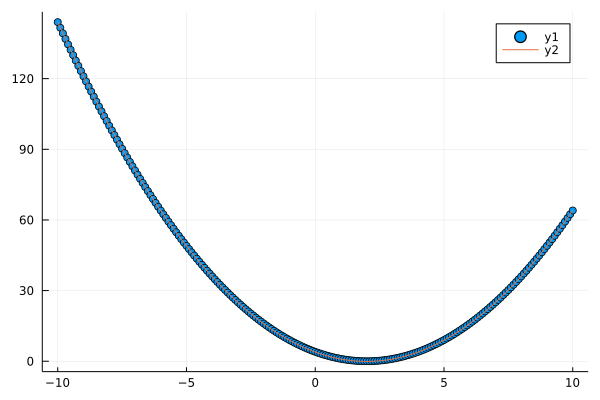

In [12]:
s=plot(x,y,seriestype = :scatter)
p=plot(x,y_pred)
plot(s,p)

# Using Zygote

In [13]:
loss(y,t)=(y-t)^2/(2*ns)    #loss function
function forward(x,y,a,b,c)  #defining forward function
    ŷ = f(x,a,b,c)
    l = loss(y,ŷ)
    return l
end

forward (generic function with 1 method)

In [14]:
ϵ=0.0001;  #learning rate

In [20]:
a,b,c=randn(3);
cnt=0;

## Training Loop

In [21]:
while true
    cnt=cnt+1
    net_loss = 0
    grad_a = 0
    grad_b = 0
    grad_c = 0
    for i = 1:ns
        net_loss += forward(x[i],y[i],a,b,c)
        _,_,g_a,g_b,g_c = gradient((a1,b1,c1,d1,e)->forward(a1,b1,c1,d1,e),x[i],y[i],a,b,c)
        grad_a += g_a
        grad_b += g_b
        grad_c += g_c
    end
    a = a - ϵ*grad_a/ns
    b = b - ϵ*grad_b/ns
    c = c - ϵ*grad_b/ns
    net_loss = net_loss/ns
    if cnt%50==0
        println("Epoch: ",cnt," Loss: ", net_loss)
    end
    if net_loss < 0.1
        break
    end
end

Epoch: 50 Loss: 46.70598228369995
Epoch: 100 Loss: 42.36704970235186
Epoch: 150 Loss: 38.44673589030625
Epoch: 200 Loss: 34.90462206416133
Epoch: 250 Loss: 31.704192237297338
Epoch: 300 Loss: 28.812456359220246
Epoch: 350 Loss: 26.199609845734972
Epoch: 400 Loss: 23.838725985910575
Epoch: 450 Loss: 21.705478051129994
Epoch: 500 Loss: 19.77788823808013
Epoch: 550 Loss: 18.03610085449845
Epoch: 600 Loss: 16.46217740670644
Epoch: 650 Loss: 15.039911474015357
Epoch: 700 Loss: 13.75466145931336
Epoch: 750 Loss: 12.593199489647958
Epoch: 800 Loss: 11.543574907304437
Epoch: 850 Loss: 10.594990942473352
Epoch: 900 Loss: 9.737693294648755
Epoch: 950 Loss: 8.962869472811867
Epoch: 1000 Loss: 8.262557855497771
Epoch: 1050 Loss: 7.629565532162973
Epoch: 1100 Loss: 7.0573940779050846
Epoch: 1150 Loss: 6.540172495466905
Epoch: 1200 Loss: 6.072596632431243
Epoch: 1250 Loss: 5.649874448344525
Epoch: 1300 Loss: 5.267676566884187
Epoch: 1350 Loss: 4.922091602732779
Epoch: 1400 Loss: 4.609585802100999
Ep

### Obtained value of parameters

In [22]:
println("a= ",a," b= ",b," c= ",c)

a= 1.1163385572951459 b= -3.268117013845521 c= -3.062164222937776
